### Importing Packages

In [5]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [6]:
from sklearn.preprocessing import StandardScaler

### Extracting training data

In [10]:
KC_train = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_train_data.csv")

### zip code dummy variable creation

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_train['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

In [12]:
for i in zip_dum_df.columns:
    KC_train[str(i)] = zip_dum_df[i]

### Checking for missing values

In [19]:
miss = KC_train.isnull().sum()
miss

0

### Log transform on sqft_living

In [ ]:
KC_train['log_sqft_living'] = np.log(KC_train['sqft_living'])
KC_train=KC_train.drop(["id","date","sqft_living","yr_built"],axis=1)

### Dropping id and date columns

In [13]:
KC_train=KC_train.drop(["id","date"],axis=1)

### Setting X and Y

In [14]:
Y_train = KC_train["price"].values
y_train = np.log(Y_train)

### Removing variables which are not significant and target variable

In [15]:
removing_variable_list = ['price','zipcode','sqft_lot15','bedrooms','lat','long',
                          'sqft_basement','sqft_above','sqft_lot','bathrooms','floors','yr_built']

In [16]:
X_train = KC_train[list(set(KC_train.columns) - set(removing_variable_list))]

In [17]:
X_train.values

array([[    0.,     0.,     0., ...,     0., 98136.,     0.],
       [    0.,     0.,     0., ...,     0., 98053.,     0.],
       [    0.,     0.,     0., ...,     0., 98115.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0., 98136.,     0.],
       [    0.,     0.,     0., ...,     0., 98144.,     0.],
       [    0.,     0.,     0., ...,     0., 98144.,     0.]])

### Standardising data

In [18]:
X_train=StandardScaler().fit_transform(X_train)
X_train

array([[-0.09204319, -0.10966748, -0.06168483, ..., -0.07029815,
         1.09415159, -0.1497178 ],
       [-0.09204319, -0.10966748, -0.06168483, ..., -0.07029815,
        -0.46597332, -0.1497178 ],
       [-0.09204319, -0.10966748, -0.06168483, ..., -0.07029815,
         0.69942119, -0.1497178 ],
       ...,
       [-0.09204319, -0.10966748, -0.06168483, ..., -0.07029815,
         1.09415159, -0.1497178 ],
       [-0.09204319, -0.10966748, -0.06168483, ..., -0.07029815,
         1.24452508, -0.1497178 ],
       [-0.09204319, -0.10966748, -0.06168483, ..., -0.07029815,
         1.24452508, -0.1497178 ]])

### Fitting LR model

In [20]:
regressor = LinearRegression()
model = regressor.fit(X_train,y_train)
print("train Accuracy",regressor.score(X_train,y_train))

train Accuracy 0.8828233260349413


In [21]:
y_pred1 = regressor.predict(X_train)

### Taking antilog of prediction

In [22]:
predictions1 = np.exp(y_pred1)

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(KC_train[['price']].values, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(KC_train[['price']].values, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_train[['price']].values, predictions1)))

Mean Absolute Error: 76613.65901783868
Mean Squared Error: 24134506970.92337
Root Mean Squared Error: 155352.84667788798


### Results

In [ ]:
print("Train Results")

print("R squared",regressor.score(X_train,y_train))

y_pred1 = regressor.predict(X_train)
predictions2 = np.exp(y_pred1)

print('Mean Absolute Error:', metrics.mean_absolute_error(KC_train[['price']].values, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(KC_train[['price']].values, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_train[['price']].values, predictions1)))

### Coefficients

X_test_columns =KC_test.drop(["price"],axis=1)
x = regressor.coef_
coeff_dict = {}
count = 0
for i in X_test_columns.columns:
    coeff_dict[i] = x[count]
    count = count + 1
df = pd.DataFrame(coeff_dict.items(),columns=['Attribute', 'Coefficient'])
df

In [36]:
removing_variable_list = ['price','zipcode','sqft_lot15','bedrooms','lat','long',
                          'sqft_basement','sqft_above','sqft_lot','bathrooms','floors','yr_built']

### Train fitting in single cell

In [37]:
KC_train = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_train_data.csv")

KC_train.loc[KC_train.bedrooms == 33, 'bedrooms'] = 3

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_train['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

for i in zip_dum_df.columns:
    KC_train[str(i)] = zip_dum_df[i]

#for i in KC_train.id:
#    KC_train.loc[(KC_train['id']==i) & (KC_train['yr_renovated']==0),'yr_renovated'] = KC_train.loc[(KC_train['id']==i),'yr_built'].values[0]
    
#KC_train.loc[KC_train['yr_renovated'] == 0 , 'renovation_index'] = 1
#KC_train.loc[KC_train['yr_renovated'] > 0 , 'renovation_index'] = 2
#KC_train.loc[KC_train['yr_renovated'] > 1970 , 'renovation_index'] = 3
#KC_train.loc[KC_train['yr_renovated'] > 1995 , 'renovation_index'] = 4 

#KC_train.loc[KC_train['yr_renovated'] == 0 , 'yr_renovated'] = 1


KC_train['log_sqft_living'] = np.log(KC_train['sqft_living'])

KC_train=KC_train.drop(["id","date","sqft_living","yr_built"],axis=1)

Y_train = KC_train["price"].values
y_train = np.log(Y_train)

X_train = KC_train[list(set(KC_train.columns) - set(removing_variable_list))].values

X_train=StandardScaler().fit_transform(X_train)

regressor = LinearRegression()
model = regressor.fit(X_train,y_train)

print("Train Results")

print("R squared",regressor.score(X_train,y_train))

y_pred1 = regressor.predict(X_train)
predictions2 = np.exp(y_pred1)

print('Mean Absolute Error:', metrics.mean_absolute_error(KC_train[['price']].values, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(KC_train[['price']].values, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_train[['price']].values, predictions1)))

Train Results
R squared 0.8794351065279636
Mean Absolute Error: 76613.65901783868
Mean Squared Error: 24134506970.92337
Root Mean Squared Error: 155352.84667788798


### Using validation data

In [38]:
KC_valid = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_valid_data.csv")

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_valid['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

for i in zip_dum_df.columns:
    KC_valid[str(i)] = zip_dum_df[i]

#KC_valid.loc[KC_valid['yr_renovated'] == 0 , 'renovation_index'] = 1
#KC_valid.loc[KC_valid['yr_renovated'] > 0 , 'renovation_index'] = 2
#KC_valid.loc[KC_valid['yr_renovated'] > 1970 , 'renovation_index'] = 3
#KC_valid.loc[KC_valid['yr_renovated'] > 1995 , 'renovation_index'] = 4

#for i in KC_valid.id:
#    KC_valid.loc[(KC_valid['id']==i) & (KC_valid['yr_renovated']==0),'yr_renovated'] = KC_valid.loc[(KC_valid['id']==i),'yr_built'].values[0]
        

KC_valid['log_sqft_living'] = np.log(KC_valid['sqft_living'])

KC_valid=KC_valid.drop(["id","date","sqft_living"],axis=1)

Y_valid = KC_valid["price"].values
y_valid = np.log(Y_valid)

X_valid = KC_valid[list(set(KC_valid.columns) - set(removing_variable_list))].values

X_valid=StandardScaler().fit_transform(X_valid)

regressor = LinearRegression()
model = regressor.fit(X_valid,y_valid)

print("Validation Results")

print("R squared",regressor.score(X_valid,y_valid))

y_pred2 = regressor.predict(X_valid)
predictions2 = np.exp(y_pred2)


print('Mean Absolute Error:', metrics.mean_absolute_error(KC_valid[['price']].values, predictions2))
print('Mean Squared Error:', metrics.mean_squared_error(KC_valid[['price']].values, predictions2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_valid[['price']].values, predictions2)))

Validation Results
R squared 0.8725485116410769
Mean Absolute Error: 74145.83809005565
Mean Squared Error: 16034915625.413435
Root Mean Squared Error: 126629.04732095805


### Taking a sample of validation data and visualising results

In [ ]:
df = pd.DataFrame({'Actual': KC_valid[['price']].values.flatten(), 'Predicted': predictions2.flatten()})
df1 = df.sample(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Using test data

In [34]:
KC_test = pd.read_csv("D:\\Praxis\\ML\\data\\kc-house-data\\wk3_kc_house_test_data.csv")

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(KC_test['zipcode'])
# you need to convert this back to a dataframe
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

for i in zip_dum_df.columns:
    KC_test[str(i)] = zip_dum_df[i]
    
#KC_test.loc[KC_test['yr_renovated'] == 0 , 'renovation_index'] = 1
#KC_test.loc[KC_test['yr_renovated'] > 0 , 'renovation_index'] = 2
#KC_test.loc[KC_test['yr_renovated'] > 1970 , 'renovation_index'] = 3
#KC_test.loc[KC_test['yr_renovated'] > 1995 , 'renovation_index'] = 4    

#for i in KC_test.id:
 #   KC_test.loc[(KC_test['id']==i) & (KC_test['yr_renovated']==0),'yr_renovated'] = KC_test.loc[(KC_test['id']==i),'yr_built'].values[0]
        

KC_test['log_sqft_living'] = np.log(KC_test['sqft_living'])    
    
KC_test=KC_test.drop(["id","date","sqft_living"],axis=1)

Y_test = KC_test["price"].values
y_test = np.log(Y_test)

X_test = KC_test[list(set(KC_test.columns) - set(removing_variable_list))].values

X_test=StandardScaler().fit_transform(X_test)

regressor = LinearRegression()
model = regressor.fit(X_test,y_test)
print("valid Accuracy",regressor.score(X_test,y_test))

y_pred3 = regressor.predict(X_test)
predictions3 = np.exp(y_pred3)

print('Mean Absolute Error:', metrics.mean_absolute_error(KC_test[['price']].values, predictions3))
print('Mean Squared Error:', metrics.mean_squared_error(KC_test[['price']].values, predictions3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(KC_test[['price']].values, predictions3)))

valid Accuracy 0.8749778714328463
Mean Absolute Error: 75216.8163013706
Mean Squared Error: 16214490381.35898
Root Mean Squared Error: 127336.13148419022


### Taking a sample and visualising results

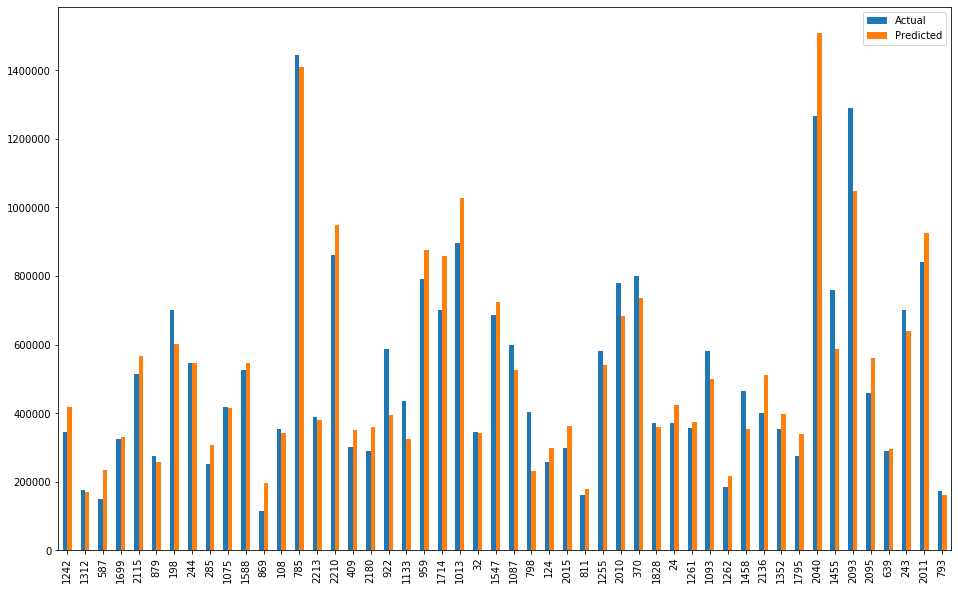

In [74]:
df = pd.DataFrame({'Actual': KC_test[['price']].values.flatten(), 'Predicted': predictions3.flatten()})
df1 = df.sample(50)
df1.plot(kind='bar',figsize=(16,10),grid=False)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(b=None)
plt.show()